In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

## Load Data from Database

In [2]:
# Connect to the database
db_path = "../../data/parking.db"
conn = sqlite3.connect(db_path)

# Load parking lots data
lots_df = pd.read_sql_query("SELECT * FROM parking_lots", conn)

# Load parking readings data
readings_df = pd.read_sql_query("SELECT * FROM parking_readings", conn)

conn.close()

print(f"Loaded {len(lots_df)} parking lots")
print(f"Loaded {len(readings_df)} parking readings")

Loaded 21 parking lots
Loaded 105 parking readings


## Explore Parking Lots

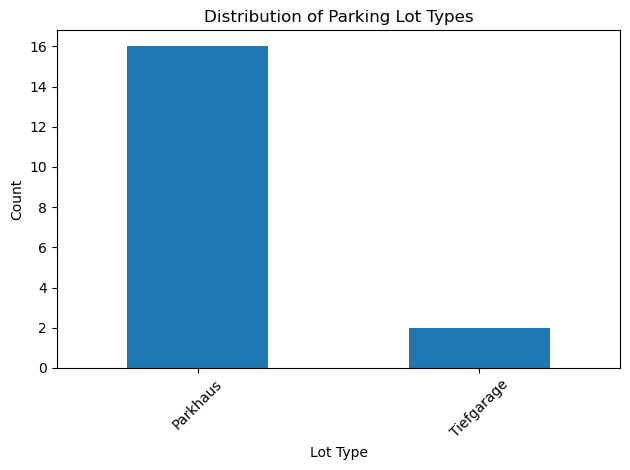

In [3]:
# Distribution of parking lot types
fig, ax = plt.subplots()
lots_df["lot_type"].value_counts().plot(kind="bar", ax=ax)
ax.set_title("Distribution of Parking Lot Types")
ax.set_xlabel("Lot Type")
ax.set_ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

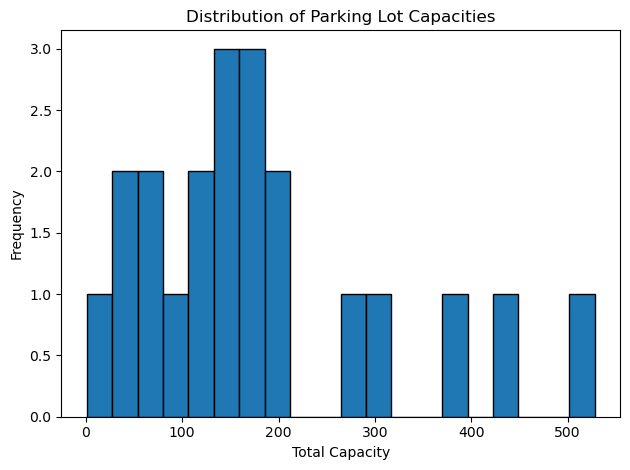


Total parking capacity: 3835 spaces
Average capacity per lot: 182.6 spaces
Median capacity: 150 spaces


In [4]:
# Total capacity distribution
fig, ax = plt.subplots()
ax.hist(lots_df["total"], bins=20, edgecolor="black")
ax.set_title("Distribution of Parking Lot Capacities")
ax.set_xlabel("Total Capacity")
ax.set_ylabel("Frequency")
plt.tight_layout()
plt.show()

print(f"\nTotal parking capacity: {lots_df['total'].sum()} spaces")
print(f"Average capacity per lot: {lots_df['total'].mean():.1f} spaces")
print(f"Median capacity: {lots_df['total'].median():.0f} spaces")

## Explore Parking Readings

In [5]:
# Convert timestamp to datetime
readings_df["timestamp"] = pd.to_datetime(readings_df["timestamp"])

In [6]:
# Merge readings with lot information to get capacity
merged_df = readings_df.merge(
    lots_df[["id", "name", "total"]],
    left_on="lot_id",
    right_on="id",
    suffixes=("", "_lot"),
)

# Calculate occupancy rate
merged_df["occupied"] = merged_df["total"] - merged_df["free"]
merged_df["occupancy_rate"] = (merged_df["occupied"] / merged_df["total"]) * 100

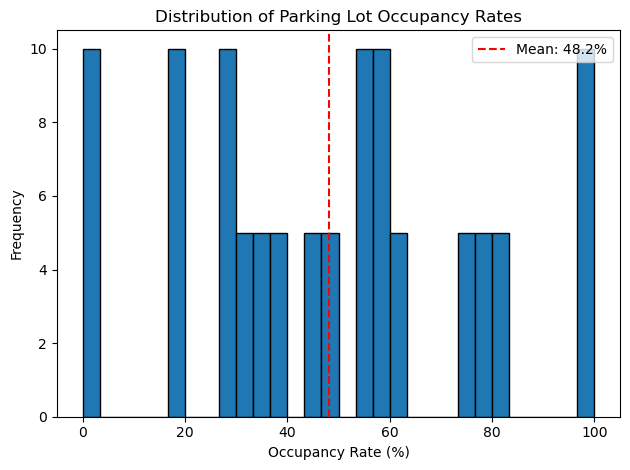

In [7]:
# Occupancy rate distribution
fig, ax = plt.subplots()
ax.hist(merged_df["occupancy_rate"], bins=30, edgecolor="black")
ax.set_title("Distribution of Parking Lot Occupancy Rates")
ax.set_xlabel("Occupancy Rate (%)")
ax.set_ylabel("Frequency")
ax.axvline(
    merged_df["occupancy_rate"].mean(),
    color="red",
    linestyle="--",
    label=f"Mean: {merged_df['occupancy_rate'].mean():.1f}%",
)
ax.legend()
plt.tight_layout()
plt.show()

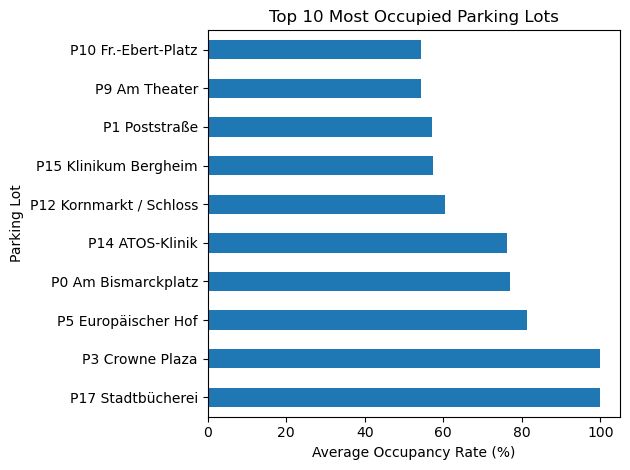

In [8]:
# Top 10 most occupied parking lots (by average occupancy)
avg_occupancy = (
    merged_df.groupby("name")["occupancy_rate"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

fig, ax = plt.subplots()
avg_occupancy.plot(kind="barh", ax=ax)
ax.set_title("Top 10 Most Occupied Parking Lots")
ax.set_xlabel("Average Occupancy Rate (%)")
ax.set_ylabel("Parking Lot")
plt.tight_layout()
plt.show()

## Geographic Analysis

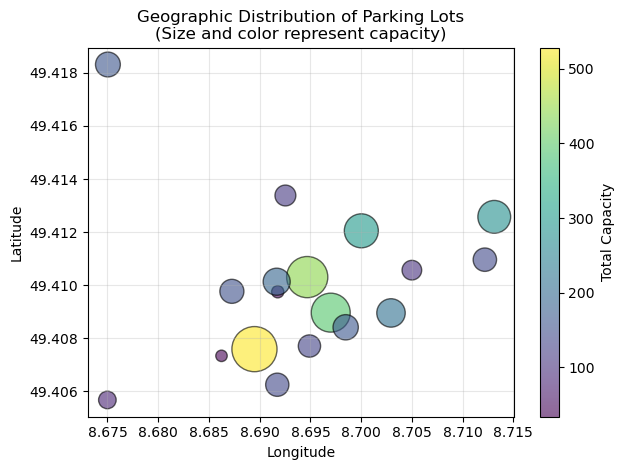

In [9]:
# Plot parking lots on a map-like scatter plot
fig, ax = plt.subplots()
scatter = ax.scatter(
    lots_df["longitude"],
    lots_df["latitude"],
    s=lots_df["total"] * 2,
    alpha=0.6,
    c=lots_df["total"],
    cmap="viridis",
    edgecolors="black",
    linewidth=1,
)
plt.colorbar(scatter, label="Total Capacity")
ax.set_title(
    "Geographic Distribution of Parking Lots\n(Size and color represent capacity)"
)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()